# Modeling Churn in Energy Company
Source: https://platform.stratascratch.com/data-projects/modelling-churn-energy-company

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
traindt = pd.read_csv("./datasets/ml_case_training_data.csv")
train_hist = pd.read_csv("./datasets/ml_case_training_hist_data.csv")
train_output = pd.read_csv("./datasets/ml_case_training_output.csv")
testdt = pd.read_csv("./datasets/ml_case_test_data.csv")
test_hist = pd.read_csv("./datasets/ml_case_test_hist_data.csv")
test_output = pd.read_csv("./datasets/ml_case_test_output_template.csv")

## (1) Data cleaning and manipulation

In [38]:
train_hist
# train_hist['id'].nunique()

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000
...,...,...,...,...,...,...,...,...
192997,16f51cdc2baa19af0b940ee1b3dd17d5,2015-08-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192998,16f51cdc2baa19af0b940ee1b3dd17d5,2015-09-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192999,16f51cdc2baa19af0b940ee1b3dd17d5,2015-10-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
193000,16f51cdc2baa19af0b940ee1b3dd17d5,2015-11-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555


In [46]:
def clean_data(df0, hist0):
    df = df0.copy()
    df = df.drop(columns=["campaign_disc_ele"])

    hist = hist0.copy()
    hist = hist.groupby("id", as_index=False).agg(
        price_p1_var_mean=("price_p1_var", "mean"),
        price_p1_var_median=("price_p1_var", "median"),
        price_p1_var_max=("price_p1_var", "max"),
        price_p1_var_min=("price_p1_var", "min"),
        price_p2_var_mean=("price_p2_var", "mean"),
        price_p2_var_median=("price_p2_var", "median"),
        price_p2_var_max=("price_p2_var", "max"),
        price_p2_var_min=("price_p2_var", "min"),
        price_p3_var_mean=("price_p3_var", "mean"),
        price_p3_var_median=("price_p3_var", "median"),
        price_p3_var_max=("price_p3_var", "max"),
        price_p3_var_min=("price_p3_var", "min"),
        price_p1_fix_mean=("price_p1_fix", "mean"),
        price_p1_fix_median=("price_p1_fix", "median"),
        price_p1_fix_max=("price_p1_fix", "max"),
        price_p1_fix_min=("price_p1_fix", "min"),
        price_p2_fix_mean=("price_p2_fix", "mean"),
        price_p2_fix_median=("price_p2_fix", "median"),
        price_p2_fix_max=("price_p2_fix", "max"),
        price_p2_fix_min=("price_p2_fix", "min"),
        price_p3_fix_mean=("price_p3_fix", "mean"),
        price_p3_fix_median=("price_p3_fix", "median"),
        price_p3_fix_max=("price_p3_fix", "max"),
        price_p3_fix_min=("price_p3_fix", "min"),
    )

    df = df.merge(hist, on="id", how="left", validate="one_to_one")

    return df


traindt_01 = clean_data(traindt, train_hist)
testdt_01 = clean_data(testdt, test_hist)

## (2) EDA

In [47]:
traindt_01

,id,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,...,price_p1_fix_max,price_p1_fix_min,price_p2_fix_mean,price_p2_fix_median,price_p2_fix_max,price_p2_fix_min,price_p3_fix_mean,price_p3_fix_median,price_p3_fix_max,price_p3_fix_min
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,2012-11-07,...,59.173468,58.936774,36.356887,36.344724,36.490689,36.344721,8.337051,8.334263,8.367731,8.334260
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,NaN,...,40.728885,40.565969,24.384011,24.339581,24.437330,24.339578,16.256008,16.226389,16.291555,16.226383
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,2009-08-21,...,44.444710,44.266930,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,764c75f661154dac3a6c254cd082ea7d,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaN,2010-04-16,...,44.444710,44.266931,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,bba03439a292a1e166f80264c16191cb,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaN,2010-03-30,...,44.444710,44.266931,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16091,18463073fb097fc0ac5d3e040f356987,NaN,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,NaN,2015-05-08,...,44.444710,44.266930,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
16092,d0a6f71671571ed83b2645d23af6de00,NaN,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2012-08-27,...,59.173468,58.936774,36.393379,36.344726,36.490689,36.344721,8.345418,8.334263,8.367731,8.334260
16093,10e6828ddd62cbcf687cb74928c4c2d2,NaN,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,NaN,2012-02-08,...,40.728885,40.565969,24.421038,24.437330,24.437330,24.339581,16.280694,16.291555,16.291555,16.226389
16094,1cf20fd6206d7678d5bcafd28c53b4db,NaN,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,NaN,2012-08-30,...,44.444710,44.266930,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [48]:
traindt_01.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,...,price_p1_fix_max,price_p1_fix_min,price_p2_fix_mean,price_p2_fix_median,price_p2_fix_max,price_p2_fix_min,price_p3_fix_mean,price_p3_fix_median,price_p3_fix_max,price_p3_fix_min
count,1.609600e+04,1.609600e+04,1.609600e+04,3508.000000,3508.000000,3508.000000,3508.000000,16096.000000,16096.000000,15970.000000,...,16094.000000,16094.000000,16094.000000,16094.000000,16094.000000,16094.000000,16094.000000,16094.000000,16094.000000,16094.000000
mean,1.948044e+05,3.191164e+04,1.946154e+04,335.843857,335.843857,3837.441866,206.845165,2370.555949,1907.347229,0.991547,...,43.536728,43.082130,10.691430,10.692635,10.798824,10.558195,6.451230,6.450397,6.525121,6.367836
std,6.795151e+05,1.775885e+05,8.235676e+04,649.406000,649.406000,5425.744327,455.634288,4035.085664,5257.364759,5.160969,...,5.409890,5.832739,12.825881,12.851969,12.897060,12.814301,7.761357,7.777749,7.819749,7.750792
min,-1.252760e+05,-3.037000e+03,-9.138600e+04,-364.940000,-364.940000,-2503.480000,0.000000,-16689.260000,-85627.000000,0.000000,...,0.000000,-0.177779,0.000000,0.000000,0.000000,-0.097752,0.000000,0.000000,0.000000,-0.065172
25%,5.906250e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,1158.175000,0.000000,513.230000,0.000000,0.000000,...,40.728885,40.565969,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.533250e+04,0.000000e+00,9.010000e+02,162.955000,162.955000,2187.230000,42.215000,1179.160000,378.000000,0.000000,...,44.444710,44.266930,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.022150e+04,0.000000e+00,4.127000e+03,396.185000,396.185000,4246.555000,228.117500,2692.077500,1994.250000,0.000000,...,44.444710,44.266930,24.388455,24.339581,24.437330,24.339578,16.248110,16.226389,16.291555,16.226383
max,1.609711e+07,4.188440e+06,4.538720e+06,12566.080000,12566.080000,81122.630000,9682.890000,103801.930000,175375.000000,50.000000,...,59.444710,59.444710,36.490692,36.490692,36.490692,36.490689,16.818917,16.791555,17.458221,16.791555


In [49]:
catvars = traindt_01.select_dtypes(include=["object"]).columns

for i, var in enumerate(catvars):
    print(
        f"{i + 1}. {var} : N={traindt_01[var].nunique()} [{traindt_01[var].unique()[:10]}]"
    )

1. id : N=16096 [['48ada52261e7cf58715202705a0451c9' '24011ae4ebbe3035111d65fa7c15bc57'
 'd29c2c54acc38ff3c0614d0a653813dd' '764c75f661154dac3a6c254cd082ea7d'
 'bba03439a292a1e166f80264c16191cb' '568bb38a1afd7c0fc49c77b3789b59a3'
 '149d57cf92fc41cf94415803a877cb4b' '1aa498825382410b098937d65c4ec26d'
 '7ab4bf4878d8f7661dfc20e9b8e18011' '01495c955be7ec5e7f3203406785aae0']]
2. activity_new : N=419 [['esoiiifxdlbkcsluxmfuacbdckommixw' nan 'sfisfxfcocfpcmckuekokxuseixdaoeu'
 'sscfoipxikopfskekuobeuxkxmwsuucb' 'cssldxpacdmuuaulamxdekcokibauube'
 'ppcxfxbffsxaakxamcdpexdoxulfwwae' 'kkklcdamwfafdcfwofuscwfwadblfmce'
 'apdekpcbwosbxepsfxclislboipuxpop' 'xwkaesbkfsacseixxksofpddwfkbobki'
 'lckfspcixfmlwudlisbaiacuioicciam']]
3. channel_sales : N=7 [['lmkebamcaaclubfxadlmueccxoimlema' 'foosdfpfkusacimwkcsosbicdxkicaua' nan
 'usilxuppasemubllopkaafesmlibmsdf' 'ewpakwlliwisiwduibdlfmalxowmwpci'
 'epumfxlbckeskwekxbiuasklxalciiuu' 'sddiedcslfslkckwlfkdpoeeailfpeds'
 'fixdbufsefwooaasfcxdxadsiekoceaa

In [50]:
traindt_01.isna().mean()

id                          0.000000
activity_new                0.593004
channel_sales               0.262053
cons_12m                    0.000000
cons_gas_12m                0.000000
cons_last_month             0.000000
date_activ                  0.000000
date_end                    0.000124
date_first_activ            0.782058
date_modif_prod             0.009754
date_renewal                0.002485
forecast_base_bill_ele      0.782058
forecast_base_bill_year     0.782058
forecast_bill_12m           0.782058
forecast_cons               0.782058
forecast_cons_12m           0.000000
forecast_cons_year          0.000000
forecast_discount_energy    0.007828
forecast_meter_rent_12m     0.000000
forecast_price_energy_p1    0.007828
forecast_price_energy_p2    0.007828
forecast_price_pow_p1       0.007828
has_gas                     0.000000
imp_cons                    0.000000
margin_gross_pow_ele        0.000808
margin_net_pow_ele          0.000808
nb_prod_act                 0.000000
n

<Axes: >

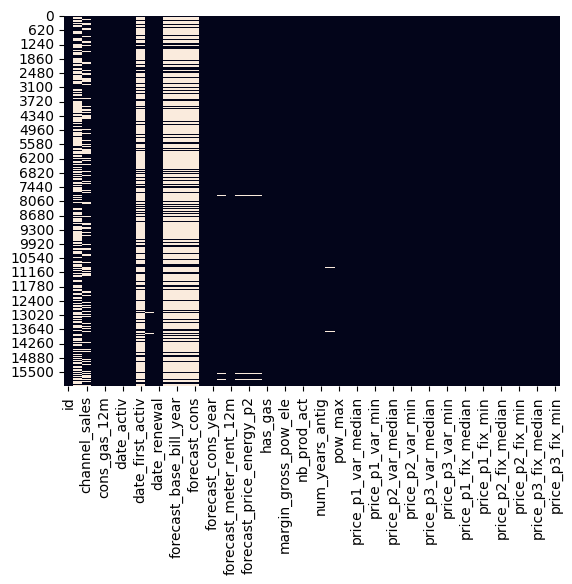

In [51]:
sns.heatmap(traindt_01.isna(), cbar=False)